In [1]:
pip install matplotlib


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


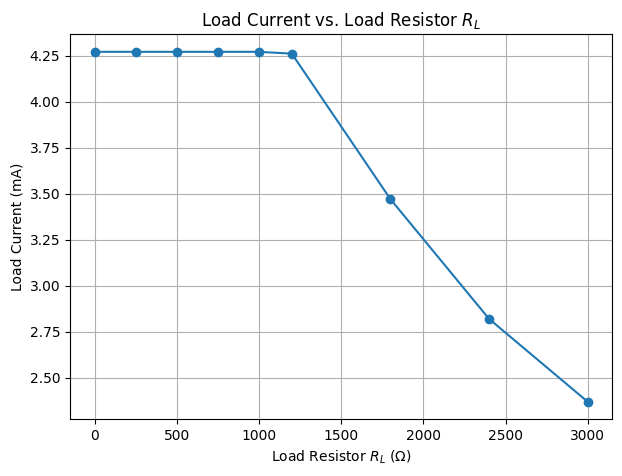

In [2]:
# Re-generate the plot after execution state reset
import numpy as np
import matplotlib.pyplot as plt

# Given data
RL_values = [0, 250, 500, 750, 1000, 1200, 1800, 2400, 3000]  # Load resistor values in ohms
Load_Current_values = [4.27, 4.27, 4.27, 4.27, 4.27, 4.26, 3.47, 2.82, 2.37]  # Current in mA

# Plot the data
plt.figure(figsize=(7, 5))
plt.plot(RL_values, Load_Current_values, marker='o', linestyle='-')

# Labels and title
plt.xlabel(r'Load Resistor $R_L$ (Ω)')
plt.ylabel(r'Load Current (mA)')
plt.title(r'Load Current vs. Load Resistor $R_L$')
plt.grid(True)

# Show the plot
plt.show()

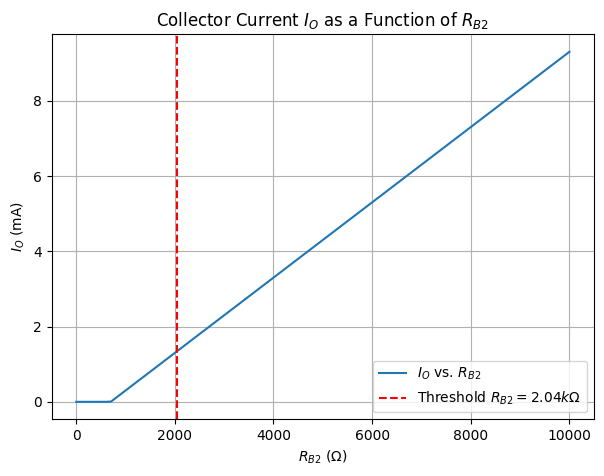

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given values
VCC = 10  # Supply voltage in V
VBE = 0.7  # Base-emitter voltage in V
RE = 1e3  # 1kΩ emitter resistor
RB_total = 10e3  # RB1 + RB2 = 10kΩ

# Generate RB2 values from 0Ω to 10kΩ
RB2_values = np.linspace(0, RB_total, 100)

# Compute Io (IC) as a function of RB2 using the derived equation
IC_values = (VCC * RB2_values - VBE * RB_total) / (RE * RB_total)

# Ensure IC is non-negative (cutoff region behavior)
IC_values = np.maximum(IC_values, 0)

# Plot Io vs RB2
plt.figure(figsize=(7, 5))
plt.plot(RB2_values, IC_values * 1e3, label=r'$I_O$ vs. $R_{B2}$')  # Convert A to mA
plt.axvline(2.04e3, color='r', linestyle='--', label=r'Threshold $R_{B2} = 2.04k\Omega$')

plt.xlabel(r'$R_{B2}$ (Ω)')
plt.ylabel(r'$I_O$ (mA)')
plt.title(r'Collector Current $I_O$ as a Function of $R_{B2}$')
plt.grid(True)
plt.legend()
plt.show()

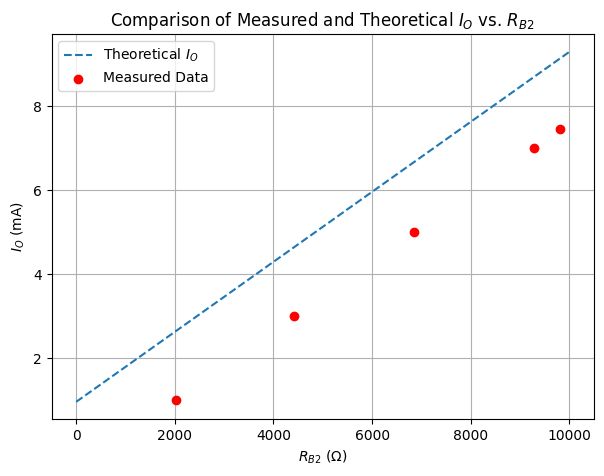

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Given circuit parameters
VCC = 10  # Supply voltage in V
VBE = 0.7  # Base-emitter voltage in V
RE = 1e3  # 1kΩ emitter resistor
RB_total = 10e3  # RB1 + RB2 = 10kΩ

# Corrected measured experimental data with updated RB2 values
VB_measured_corrected = np.array([1.678, 3.677, 5.711, 7.73, 8.18])  # Measured base voltages in V
Io_measured_corrected = np.array([1e-3, 3e-3, 5e-3, 7e-3, 7.453e-3])  # Measured Io in A

# Compute corrected RB2 values using the revised voltage divider equation
RB2_corrected = (VB_measured_corrected / VCC) * (RB_total + 2e3)

# Generate corrected theoretical RB2 vs Io values
RB2_theoretical_corrected = np.linspace(0, RB_total, 100)
VB_theoretical_corrected = VCC * (RB2_theoretical_corrected + 2e3) / (RB_total + 2e3)
Io_theoretical_corrected = (VB_theoretical_corrected - VBE) / RE
Io_theoretical_corrected = np.maximum(Io_theoretical_corrected, 0)  # Ensure non-negative values

# Plot corrected measured Io vs RB2 along with corrected theoretical curve
plt.figure(figsize=(7, 5))

# Corrected Theoretical (Prelab) Plot
plt.plot(RB2_theoretical_corrected, Io_theoretical_corrected * 1e3, linestyle='--', label="Theoretical $I_O$")

# Updated Corrected Experimental Data Points
plt.scatter(RB2_corrected, Io_measured_corrected * 1e3, color='red', label="Measured Data", zorder=3)

# Labels and title
plt.xlabel(r'$R_{B2}$ (Ω)')
plt.ylabel(r'$I_O$ (mA)')
plt.title(r'Comparison of Measured and Theoretical $I_O$ vs. $R_{B2}$')
plt.grid(True)
plt.legend()
plt.show()

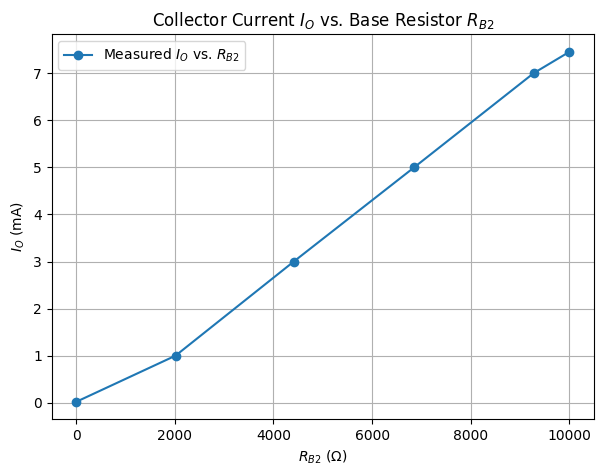

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Given data points
RB2_values = np.array([0, 2013.6, 4412.4, 6853.2, 9276, 10e3])  # RB2 in Ω
Io_values = np.array([0.02e-3, 1e-3, 3e-3, 5e-3, 7e-3, 7.453e-3])  # Io in A

# Convert current to mA for better visualization
Io_values_mA = Io_values * 1e3

# Create the plot
plt.figure(figsize=(7, 5))
plt.plot(RB2_values, Io_values_mA, marker='o', linestyle='-', label=r'Measured $I_O$ vs. $R_{B2}$')

# Labels and title
plt.xlabel(r'$R_{B2}$ (Ω)')
plt.ylabel(r'$I_O$ (mA)')
plt.title(r'Collector Current $I_O$ vs. Base Resistor $R_{B2}$')
plt.grid(True)
plt.legend()

# Display the plot
plt.show()